# Analysis of ads of apartments for sale ads

Yandex Real Estate is an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years.

The purpose of theresearch is to find out:

1. The dependence of the cost of housing on the following parameters: area, price, number of rooms, ceiling height, date of placement: day of the week, month and year.
2. The dependence of the cost of housing on the location.
3. The dependence of the cost of housing on the following parameters: area, price, number of rooms, ceiling height, date of placement: day of the week, month and year” in the central area.
4. The parameters in the central and other areas are different.

The research will take place in three stages:

- Review data.
- Data preprocessing.
- Exploratory data analysis.


## Data overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
def info(df):
    display(df.info())
    print(100*'=')
    display(df.describe())
    print(100*'=')
    print(f'Number of null values: {df.isna().mean()}')
    print(100*'=')
    print(f'Number of duplicates: {df.duplicated().sum()}')
    print(100*'=')
    display(df.head())
display(info(df))     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Number of null values: total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64
Number of duplicates: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


None

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Based on the data in the table, we can conclude that before analysis, it is necessary to perform preprocessing.


So, the table has eleven columns. The data types in the columns are `int`, `object`, `float`.

According to the data documentation:

`airports_nearest` — distance to the nearest airport in meters (m)

`balcony` — number of balconies

`ceiling_height` - ceiling height (m)

`cityCenters_nearest` — distance to city center (m)

`days_exposition` - the number of days the ad was placed (from publication to removal)

`first_day_exposition` — publication date

`floor` — floor

`floors_total` - total floors in the house

`is_apartment` — apartments (boolean type)

`kitchen_area` - kitchen area in square meters (m²)

`last_price` - price at the time of unpublishing

`living_area` - living area in square meters (m²)

`locality_name` — name of the locality

`open_plan` - free layout (boolean type)

`parks_around3000` - number of parks within a 3 km radius

`parks_nearest` — distance to the nearest park (m)

`ponds_around3000` - the number of ponds within a radius of 3 km

`ponds_nearest` — distance to the nearest body of water (m)

`rooms` - number of rooms

`studio` — studio apartment (boolean)

`total_area` — area of the apartment in square meters (m²)

`total_images` - the number of photos of the apartment in the ad


- It is necessary to change the data type in the following columns `floors_total`, `is_apartment`, `balcony`, `days_exposition`.
- There are missing values in the data, it needs to be examined and replaced if necessary.

## Data preprocessing

### Studying data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
df.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### Filling in the data

In [11]:
df['last_price'] = df['last_price'].astype(int)
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['balcony'] = df['balcony'].fillna(value=0).astype(int)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)
df.loc[df['rooms'] == 0 ,'rooms'] = 1

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)

In [14]:
df['floors_total'] = df['floors_total'].astype(int)

In [15]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

In [16]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

We can observe the following missing values.

- Missing values for the total number of floors and the name of the settlement can be removed, since there are only 0.3% of missing values, and replacing them with an average value is not possible.
- Number of floors
- The missing number of balconies means that there are not any in the apartment, so let's replace the gaps with 0.
- Missing values in the `is_apartment` column will be replaced with False.
- Missing values in `parks_around3000` and `ponds_around3000`. Perhaps the gaps mean no parks or ponds, so let's replace the missing values with 0.
- Replacing missing values with median in `days_exposition`, `ceiling_height`.
- Changing the data type to `int` in `parks_around3000`,`balcony`,`last_price`,`floors_total`,`days_exposition`.
- Replacing the publication date data type with the datetime type

## Calculations and adding results to the table

In [18]:
df['price_per_area'] = df['last_price']/ df['total_area']

In [19]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [20]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,4232.0,1,796.0,3,381.0,NaN,72490.845228,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,0,NaN,0,NaN,45.0,52542.372881,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,0,NaN,0,NaN,NaN,44091.710758,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,10364.0,2,173.0,3,196.0,602.0,149511.400651,1,3,2017


In [21]:
def floor_category(floor):
    if floor['floor'] == 1:
        return 'first'
    elif floor['floor'] == floor['floors_total']:
        return 'second'
    else:
        return 'other'

In [22]:
df['floor_category'] = df.apply(floor_category, axis=1)

In [23]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,other
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,first
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,other
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,other
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,1,796.0,3,381.0,NaN,72490.845228,1,3,2017,other
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,0,NaN,0,NaN,45.0,52542.372881,0,1,2018,other
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0,NaN,0,NaN,NaN,44091.710758,6,2,2018,first
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,2,173.0,3,196.0,602.0,149511.400651,1,3,2017,other


In [24]:
df.loc[df['floors_total'] == df['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year,floor_category
12,10,3890000,54.0,2016-06-30,2,2.65,5,30.0,5,False,...,0,NaN,0,NaN,90.0,72037.037037,3,6,2016,second
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,1,294.0,3,298.0,366.0,82943.925234,5,7,2017,second
23,11,2950000,32.0,2016-10-29,1,2.60,9,17.7,9,False,...,2,517.0,1,190.0,615.0,92187.500000,5,10,2016,second
36,13,3790000,45.0,2017-01-25,2,2.65,9,27.0,9,False,...,1,459.0,0,NaN,139.0,84222.222222,2,1,2017,second
43,13,9330000,48.0,2017-01-10,2,3.00,4,28.0,4,False,...,0,NaN,1,492.0,763.0,194375.000000,1,1,2017,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23641,3,3100000,30.0,2018-03-28,1,2.50,5,17.0,5,False,...,0,NaN,0,NaN,10.0,103333.333333,2,3,2018,second
23644,7,4990000,62.5,2018-04-26,2,2.70,4,32.3,4,False,...,1,560.0,1,171.0,166.0,79840.000000,3,4,2018,second
23648,14,10100000,78.0,2017-05-12,3,3.27,5,48.6,5,False,...,1,621.0,2,117.0,621.0,129487.179487,4,5,2017,second
23660,1,2950000,53.6,2018-02-01,2,2.75,3,32.0,3,False,...,0,NaN,0,NaN,35.0,55037.313433,3,2,2018,second


In [25]:
df['living_total_ratio'] = df['living_area'] / df['total_area']
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area'] 

In [26]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year,floor_category,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3,234.0,424.0,408176.100629,4,7,2015,other,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,other,0.320000,0.410000


Before starting the exploratory data analysis, we calculated:
- price per square meter
- day of the week, month and year of publication of the announcement
- the ratio of living and total area, as well as the ratio of kitchen area to total
- identified the following categories of floors of the apartment: first, last, other

## Exploratory data analysis

### Studying the main parameters

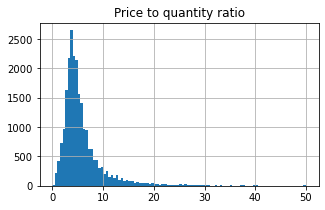

In [27]:
df['last_price'] = df['last_price'] / 1000000
df.hist('last_price', bins=100, range = (0,50), figsize = (5,3), grid=True)
plt.title('Price to quantity ratio')
plt.show();

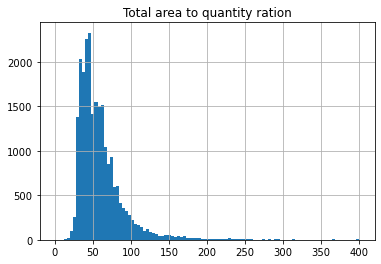

In [28]:
df.hist('total_area', bins=100, range=(0,400))
plt.title('Total area to quantity ration')
plt.show();

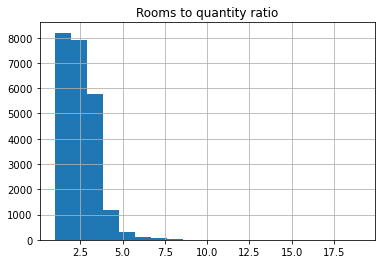

In [29]:
df['rooms'].hist(bins = df['rooms'].max())
plt.title('Rooms to quantity ratio')
plt.show();

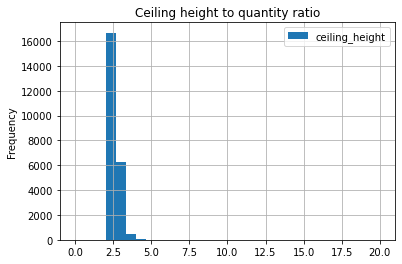

In [30]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid = True, range = (0,20))
plt.title('Ceiling height to quantity ratio');
plt.show();

In [31]:
df[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,23565.000000,23565.000000,23565.000000,23565.000000
mean,6.540058,60.322824,2.078888,2.724530
std,10.910935,35.657060,1.066503,0.991026
min,0.012190,12.000000,1.000000,1.000000
25%,3.400000,40.000000,1.000000,2.600000
50%,4.646000,52.000000,2.000000,2.650000
75%,6.790000,69.700000,3.000000,2.700000
max,763.000000,900.000000,19.000000,100.000000


- The average value of the price is 6.5 million rubles.
- The total area of the property ranges from 12 to 900 m2, with an average of 60 m2.
- The number of rooms is from 1 to 19, one-room apartments prevail.
- Ceiling heights range from 1m to 100m, average 2.75m.

### Studying the time of exposition

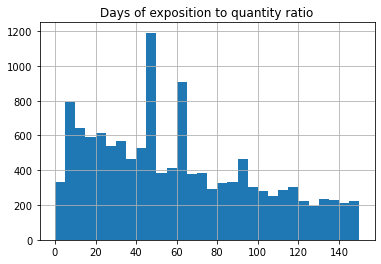

In [32]:
df['days_exposition'].hist(bins=30,range=(0,150))
plt.title('Days of exposition to quantity ratio')
plt.show();
plt.show();

In [33]:
df.days_exposition.describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

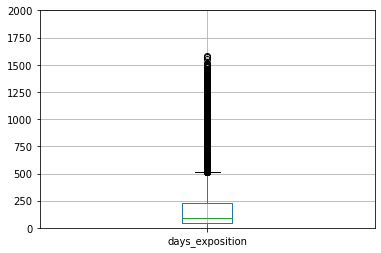

In [34]:
plt.ylim(0,2000)
df.boxplot(column='days_exposition') 
plt.show()

Most apartments are sold within a period of 100 days.
We found that there are outliers in these publication days. We must discard values that are 0 and greater than 400 days.

### Rare and outlier values

In [35]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year,living_total_ratio,kitchen_total_ratio
count,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,...,8030.000000,23565.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,21700.000000,21343.000000
mean,9.878421,6.540058,60.322824,2.078888,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,...,490.580448,0.589900,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,0.564937,0.187340
std,5.681156,10.910935,35.657060,1.066503,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,...,341.572956,0.883966,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,0.105310,0.072979
min,0.000000,0.012190,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,0.495444,0.133333
50%,9.000000,4.646000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,455.000000,0.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.568210,0.172363
75%,14.000000,6.790000,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,0.637913,0.232432
max,50.000000,763.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


Outliers in the published days and number of rooms data have been discarded.

In [36]:
df_new = df.query('last_price < 200 and ceiling_height < 4 and ceiling_height > 2.2 and total_area <= 200')

In [37]:
df_new.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year,living_total_ratio,kitchen_total_ratio
count,23228.000000,23228.000000,23228.000000,23228.000000,23228.000000,23228.000000,21399.000000,23228.000000,21050.000000,23228.000000,...,7829.000000,23228.000000,8820.000000,20138.000000,23228.000000,23228.000000,23228.000000,23228.000000,21399.000000,21050.000000
mean,9.848803,5.977015,58.073266,2.041760,2.688475,10.733985,33.188504,5.894179,10.366688,0.595703,...,491.752714,0.580678,520.911224,179.443142,98148.610823,2.566342,6.399389,2017.374204,0.564398,0.188110
std,5.655990,5.496555,26.414911,0.982244,0.191993,6.600415,17.299559,4.883443,5.344339,0.960768,...,342.971250,0.876147,277.971542,218.312961,42933.255241,1.789629,3.492532,1.035251,0.104873,0.072710
min,0.000000,0.012190,12.000000,1.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000,40.000000,1.000000,2.600000,5.000000,18.525000,2.000000,7.000000,0.000000,...,288.000000,0.000000,297.000000,45.000000,76489.425619,1.000000,3.000000,2017.000000,0.495062,0.134043
50%,9.000000,4.600000,51.600000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,456.000000,0.000000,505.000000,95.000000,94808.477256,3.000000,6.000000,2017.000000,0.567442,0.173077
75%,14.000000,6.662500,68.600000,3.000000,2.700000,16.000000,42.000000,8.000000,11.900000,1.000000,...,613.000000,1.000000,733.000000,229.000000,113764.214690,4.000000,10.000000,2018.000000,0.637012,0.233146
max,50.000000,135.000000,200.000000,11.000000,3.980000,60.000000,164.700000,33.000000,93.200000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,995983.935743,6.000000,12.000000,2019.000000,1.000000,0.787879


In [38]:
df.shape[0]

23565

In [39]:
df_new.shape[0]

23228

In [40]:
conv =  df_new.shape [0] / df.shape[0] 
conv

0.9856991300657755

### Factors affecting the cost of an apartment

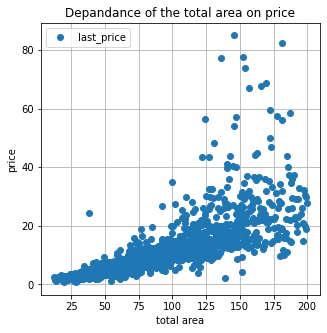

In [41]:
df_new.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.title('Depandance of the total area on price')
plt.xlabel('total area')
plt.ylabel('price')
plt.show();

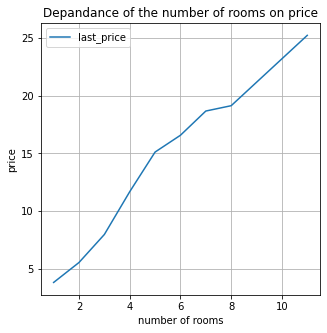

In [42]:
df_new.pivot_table(index='rooms', values='last_price').plot(grid=True, style='-', figsize=(5, 5))
plt.title('Depandance of the number of rooms on price')
plt.xlabel('number of rooms')
plt.ylabel('price')
plt.show();

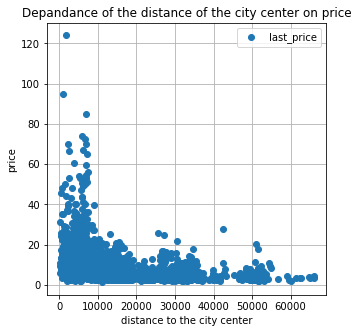

In [43]:
df_new.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.title('Depandance of the distance of the city center on price')
plt.xlabel('distance to the city center')
plt.ylabel('price')
plt.show();

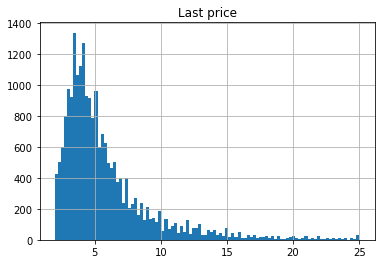

In [44]:
df_new['last_price'].hist(bins=100,range=(2,25))
plt.title('Last price')
plt.show();

In [45]:
df_new[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']].corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.788675,-0.238902,0.718832
rooms,0.788675,1.000000,-0.167826,0.426529
cityCenters_nearest,-0.238902,-0.167826,1.000000,-0.303744
last_price,0.718832,0.426529,-0.303744,1.000000


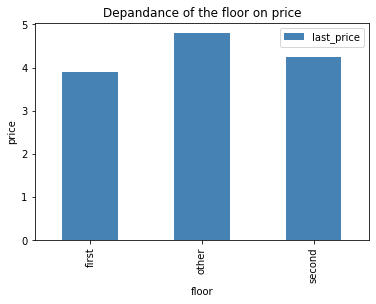

In [46]:
df_new.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title('Depandance of the floor on price')
plt.xlabel('floor')
plt.ylabel('price')
plt.show();

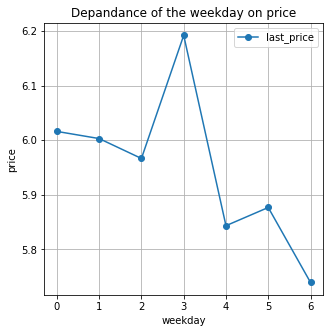

In [47]:
df_new.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Depandance of the weekday on price')
plt.xlabel('weekday')
plt.ylabel('price')
plt.show();

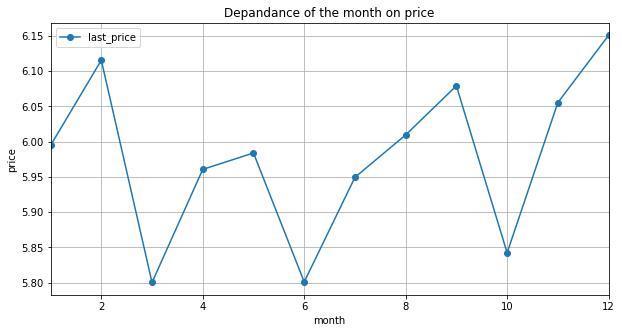

In [48]:
df_new.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.title('Depandance of the month on price')
plt.xlabel('month')
plt.ylabel('price')
plt.show();

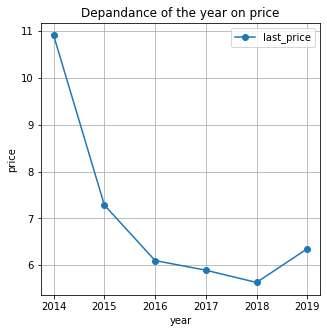

In [49]:
df_new.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Depandance of the year on price')
plt.xlabel('year')
plt.ylabel('price')
plt.show();

From the above histograms, the following conclusions can be drawn:

- The larger the area of the property is, the higher its price is.
- The price also directly depends on the number of rooms, the more rooms there are, the higher the cost of housing is.
- The location of the property affects the cost of the apartment, apartments closer to the center are more expensive.
- The cheapest apartments are on the first floor, then the last one, and then goes others.

- Apartments published are more expensive on Thursday and are cheaper on Sunday.
- More expensive apartments published in December, cheapest in March and June.
- Apartments became cheaper in 2016-2018, in 2019 real estate value growth is noticeable.


### Average cost per square meter in the top 10 cities

In [50]:
df_new.pivot_table(index='locality_name',values='last_price',aggfunc=('count','median')).sort_values(by='count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15363,5.500
посёлок Мурино,518,3.400
посёлок Шушары,439,3.950
Всеволожск,395,3.450
Пушкин,362,5.150
Колпино,337,3.600
посёлок Парголово,326,4.100
Гатчина,305,3.090
деревня Кудрово,299,3.790


The table shows that in St. Petersburg the highest cost of 1 m2, the lowest cost of 1 m2 in Vyborg.

### Central zone border

In [51]:
df_new['near_center'] = df_new['cityCenters_nearest'] / 1000
df_new['near_center'] = df_new['near_center'].fillna(value=0).astype(int)

In [52]:
spb_center = df_new.query('near_center <= 6 and locality_name == "Санкт-Петербург"')
spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_area,weekday,month,year,floor_category,living_total_ratio,kitchen_total_ratio,near_center
3,0,64.900,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,234.0,424.0,408176.100629,4,7,2015,other,NaN,NaN,6
24,8,6.500,97.20,2015-10-31,2,2.65,3,46.5,1,False,...,124.0,265.0,66872.427984,5,10,2015,first,0.478395,0.201646,2
35,6,15.500,149.00,2017-06-26,5,2.65,5,104.0,4,False,...,779.0,644.0,104026.845638,0,6,2017,other,0.697987,0.114094,3
51,7,45.000,161.00,2017-10-17,3,3.20,8,38.0,4,False,...,99.0,541.0,279503.105590,1,10,2017,other,0.236025,0.310559,6
52,20,11.795,136.00,2017-09-22,6,3.00,2,94.0,2,False,...,NaN,NaN,86727.941176,4,9,2017,second,0.691176,0.080882,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9.000,110.00,2015-12-10,4,3.36,7,64.6,5,False,...,118.0,816.0,81818.181818,3,12,2015,other,0.587273,0.143636,5
23665,11,4.250,47.00,2016-05-20,1,2.65,6,18.2,1,False,...,519.0,131.0,90425.531915,4,5,2016,first,0.387234,0.310638,4
23690,3,5.500,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,NaN,15.0,105769.230769,3,7,2018,other,0.596154,0.115385,6
23691,11,9.470,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,806.0,519.0,129903.978052,3,10,2016,other,0.552812,0.145405,4


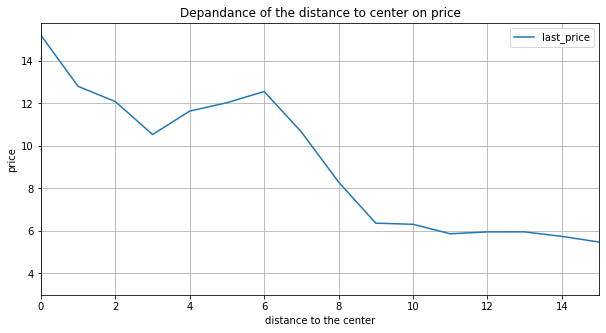

In [53]:
df_new.query('locality_name == "Санкт-Петербург"').pivot_table(index='near_center', values='last_price').plot(grid=True, style='-', xlim=(0,15), figsize=(10, 5))
plt.title('Depandance of the distance to center on price')
plt.xlabel('distance to the center')
plt.ylabel('price')
plt.show();


The apartments, which are located 8 km from the center, are included in the central zone.

### Analysis of the segment of apartments in the center

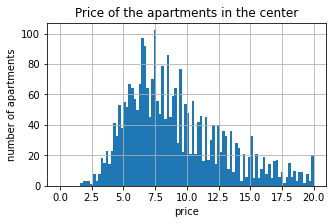

In [54]:
spb_center.hist('last_price', bins=100, range = (0,20), figsize = (5,3), grid=True)
plt.title('Price of the apartments in the center')
plt.xlabel('price')
plt.ylabel('number of apartments')
plt.show();

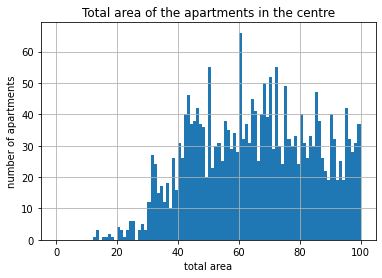

In [55]:
spb_center.hist('total_area', bins=100, range=(0,100))
plt.title('Total area of the apartments in the centre')
plt.xlabel('total area')
plt.ylabel('number of apartments')
plt.show();

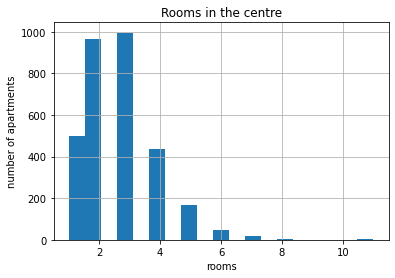

In [56]:
spb_center['rooms'].hist(bins = df['rooms'].max())
plt.title('Rooms in the centre')
plt.xlabel('rooms')
plt.ylabel('number of apartments')
plt.show();

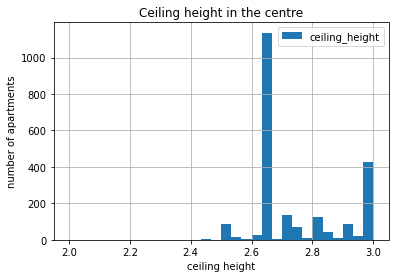

In [57]:
spb_center.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid = True, range = (2,3))
plt.title('Ceiling height in the centre')
plt.xlabel('ceiling height')
plt.ylabel('number of apartments')
plt.show();

In [58]:
spb_center[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,3140.000000,3140.000000,3140.000000,3140.000000
mean,11.953966,83.739003,2.697771,2.914596
std,10.125575,36.905589,1.225484,0.312977
min,1.600000,12.000000,1.000000,2.400000
25%,6.598250,56.000000,2.000000,2.650000
50%,8.970000,76.350000,3.000000,2.800000
75%,13.200000,104.150000,3.000000,3.100000
max,135.000000,200.000000,11.000000,3.980000


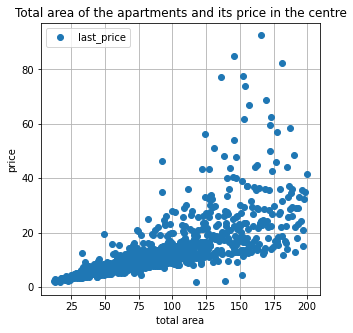

In [59]:
spb_center.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.title('Total area of the apartments and its price in the centre')
plt.xlabel('total area')
plt.ylabel('price')
plt.show();

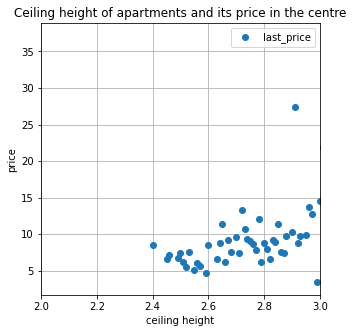

In [60]:
spb_center.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, style='o', figsize=(5, 5), xlim=(2,3))
plt.title('Ceiling height of apartments and its price in the centre')
plt.xlabel('ceiling height')
plt.ylabel('price')
plt.show();


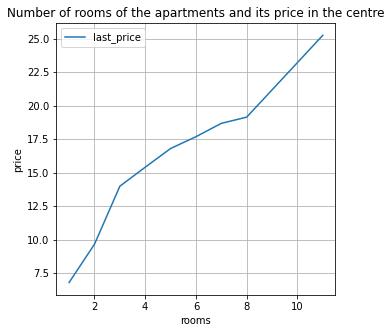

In [61]:
spb_center.pivot_table(index='rooms', values='last_price').plot(grid=True, style='-', figsize=(5, 5))
plt.title('Number of rooms of the apartments and its price in the centre')
plt.xlabel('rooms')
plt.ylabel('price')
plt.show();

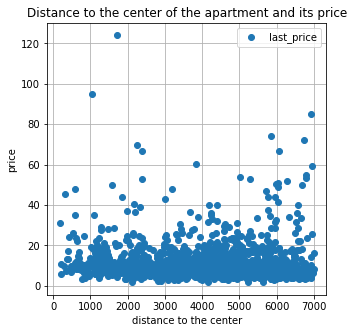

In [62]:
spb_center.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.title('Distance to the center of the apartment and its price')
plt.xlabel('distance to the center')
plt.ylabel('price')
plt.show();


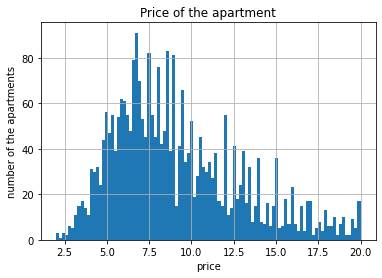

In [63]:
spb_center['last_price'].hist(bins=100,range=(2,20))
plt.title('Price of the apartment')
plt.xlabel('price')
plt.ylabel('number of the apartments')
plt.show();

In [64]:
spb_center[['total_area', 'rooms', 'cityCenters_nearest','last_price']].corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.767389,-0.117256,0.628574
rooms,0.767389,1.000000,-0.189445,0.311828
cityCenters_nearest,-0.117256,-0.189445,1.000000,-0.005965
last_price,0.628574,0.311828,-0.005965,1.000000


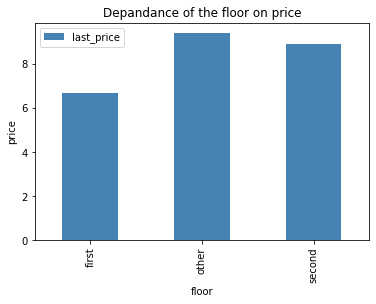

In [65]:
spb_center.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title('Depandance of the floor on price')
plt.xlabel('floor')
plt.ylabel('price')
plt.show();

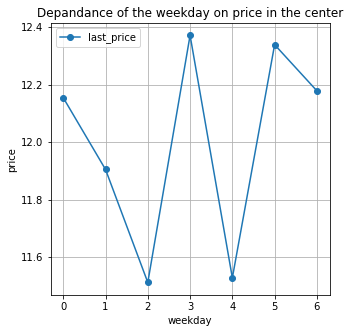

In [66]:
spb_center.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Depandance of the weekday on price in the center')
plt.xlabel('weekday')
plt.ylabel('price')
plt.show();

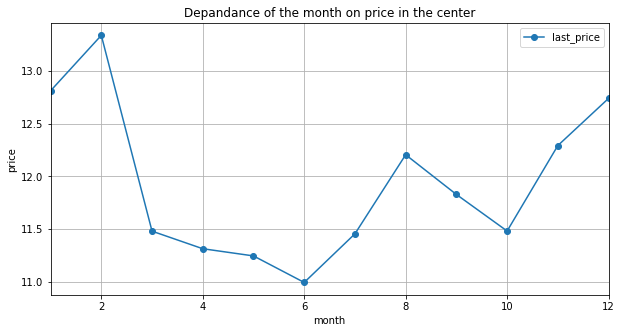

In [67]:
spb_center.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.title('Depandance of the month on price in the center')
plt.xlabel('month')
plt.ylabel('price')
plt.show();

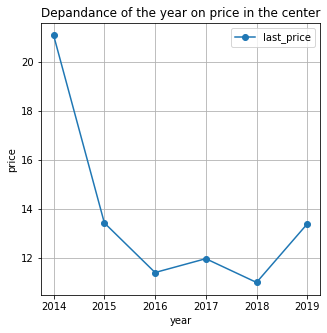

In [68]:
spb_center.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Depandance of the year on price in the center')
plt.xlabel('year')
plt.ylabel('price')
plt.show();

- In the central zone, one can observe a negative correlation in the parameter indicating the distance from the center, which means that there is no dependence on the distance from the city center.
- Most of all two-room and three-room apartments, with an area of 70 m2.
- Just like in other areas, there is a direct dependence of the cost of apartments on the area and the number of rooms. The larger the area, the higher the value of the property.
- More expensive apartments sold on Thursday, February, cheaper on Wednesday and June.
- The dependence of the date of publication is the same as in other zones. We can see significant growth in 2018-2019.

## Summary

Based on the analysis of the data, the following conclusions can be drawn.

1. The most expensive m2 in St. Petersburg, cheaper in Vyborg.
2. The cost of housing depends on the area of the apartment and the number of rooms.
3. The cost of apartments on the ground floor is much lower than on others.
4. The closer to the center the apartment is located, the higher its cost is.
5. In the central area, there is no dependence of the cost on the distance of the apartment from the center.
6. The cost of housing in the central area shows an increase in 2018-2019.